In [ ]:
Week 1:

In [ ]:
Project Title:AI-Powered Flood Probability Prediction using Socio-Environmental Factors

In [ ]:
Problem Statement:
Floods are among the most frequent and devastating natural disasters, causing severe loss of life, damage to infrastructure,
and long-term economic setbacks. Traditional flood prediction methods often rely solely on meteorological data,overlooking other critical 
socio-environmental factors such as deforestation, urbanization, poor river management, and climate change.
There is a need for a data-driven, AI-based system that can leverage multiple environmental and human-influenced parameters to predict flood 
probability more accurately.

In [ ]:
Project Description
This project develops a Machine Learning model to predict the probability of floods based on multiple factors, including monsoon intensity, drainage systems, urbanization, deforestation, climate change, and population pressure.
The model is trained on a large dataset containing over 1.1 million records, with features representing both natural conditions and human activities.
Using Random Forest Regression, the system achieves a strong predictive performance (R² ≈ 0.66) with low error rates.
The output is a FloodProbability score (0–1) that indicates the likelihood of a flood under given conditions.
The solution can be extended with real-time weather APIs to build an Early Warning System and integrated into dashboards for policy makers and disaster management authorities.
By combining AI + environmental factors, this project provides a scalable, data-driven decision support system for disaster risk reduction under the theme of Climate Risk & Disaster Management.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
X = train_df.drop(columns=["id", "FloodProbability"])
y = train_df["FloodProbability"]

In [7]:
test_ids = test_df["id"]
X_test_final = test_df.drop(columns=["id"])

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [12]:
y_val_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MAE: {mae:.4f}")
print(f"Validation RMSE: {rmse:.4f}")
print(f"Validation R²: {r2:.4f}")

Validation MAE: 0.0244
Validation RMSE: 0.0298
Validation R²: 0.6584


In [ ]:
Week 2:

In [13]:
print(train_df.shape)
train_df.head()

(1117957, 22)


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [15]:
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

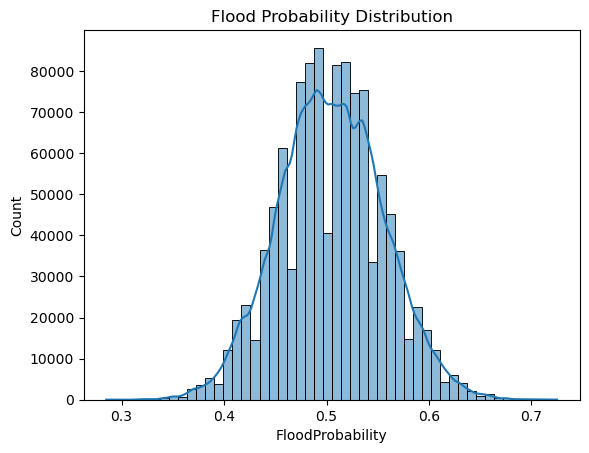

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df["FloodProbability"], bins=50, kde=True)
plt.title("Flood Probability Distribution")
plt.show()


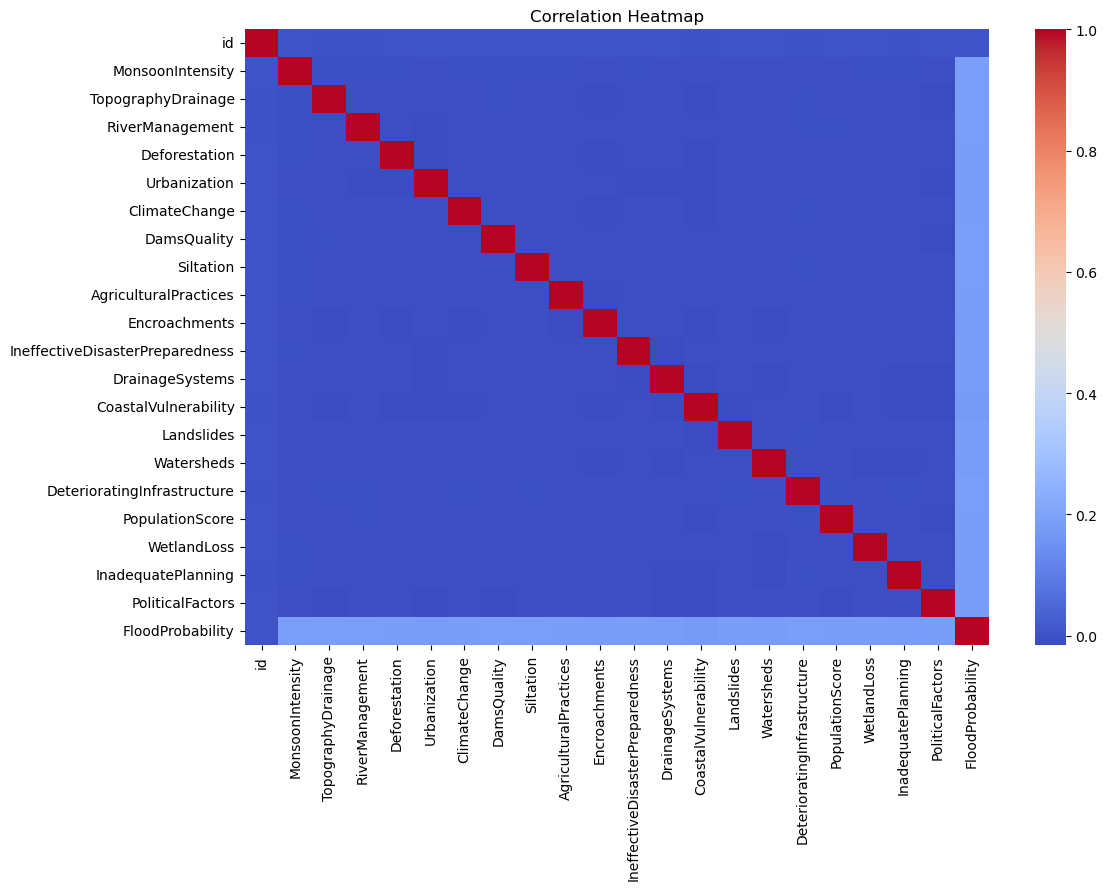

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

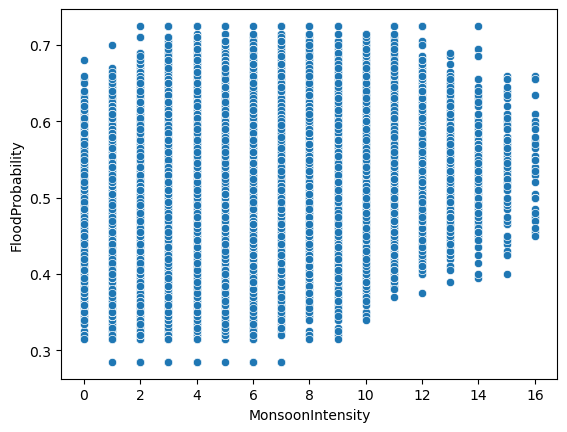

In [23]:
sns.scatterplot(x="MonsoonIntensity", y="FloodProbability", data=train_df)
plt.show()

In [35]:
# Drop unnecessary columns
# train.csv has "id" so we drop it, test.csv does NOT have "id", so no need to drop
if "id" in train_df.columns:
    train_df = train_df.drop(columns=["id"])

# For test_df, drop "id" only if it exists
if "id" in test_df.columns:
    test_df = test_df.drop(columns=["id"])

# Check for skewness & normalize if needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop(columns=["FloodProbability"]))
scaled_df = pd.DataFrame(scaled_features, columns=train_df.columns[:-1])
scaled_df["FloodProbability"] = train_df["FloodProbability"]

scaled_df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0.038198,1.467769,0.021561,1.490363,0.507578,-0.453941,-0.458881,-0.933107,-0.939124,-0.455632,...,0.025627,-0.935421,-0.929312,0.034080,-0.448422,0.999183,0.023754,0.989569,-0.927598,0.445
1,0.524488,0.990186,-0.461022,-0.459251,1.467552,1.489938,-0.938943,0.034951,-0.455692,0.504372,...,0.990723,-1.414142,-2.372809,-0.926353,0.035884,-0.929294,-0.943039,-0.451962,-0.927598,0.450
2,0.524488,0.035021,0.504143,1.002959,-0.932383,1.003968,-1.899068,0.034951,-0.455692,0.024370,...,0.990723,-0.935421,0.995351,0.034080,0.520189,1.481302,-1.426435,-0.932472,-0.927598,0.530
3,-0.934382,-0.442562,0.504143,0.028152,-0.452396,1.489938,-0.458881,1.003010,0.511171,1.464377,...,-1.422018,-0.456700,0.995351,-0.446137,-0.448422,0.517064,0.023754,0.989569,0.029180,0.535
4,0.038198,-0.920145,-1.426186,0.515556,-0.452396,-0.453941,-0.938943,-0.933107,-0.939124,-0.935635,...,-1.422018,-1.414142,0.514185,0.514296,-0.448422,-1.893533,-1.426435,-0.932472,0.029180,0.415


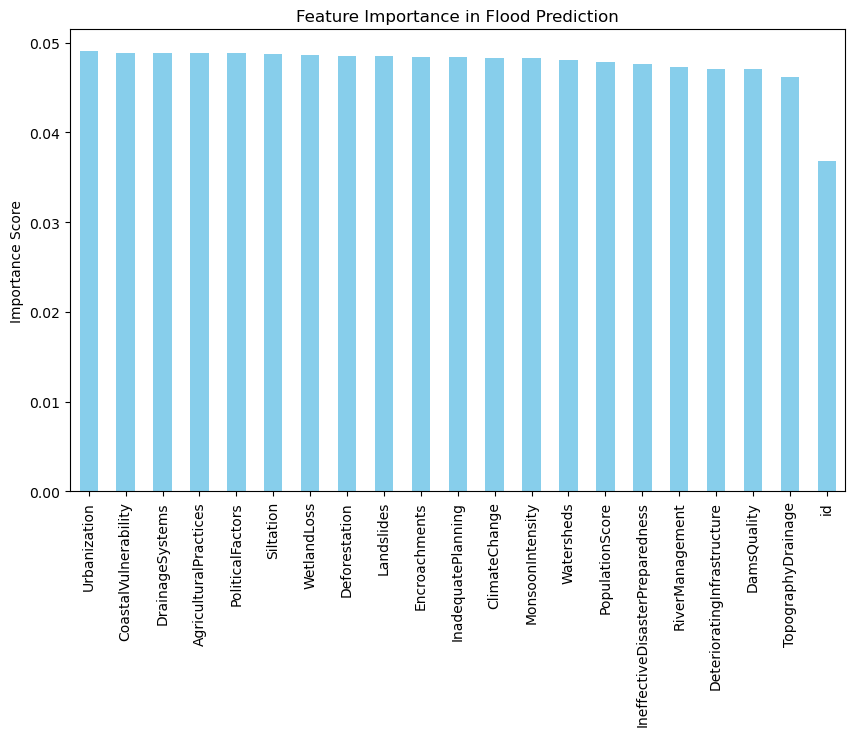

Urbanization                       0.049012
CoastalVulnerability               0.048834
DrainageSystems                    0.048831
AgriculturalPractices              0.048794
PoliticalFactors                   0.048781
Siltation                          0.048761
WetlandLoss                        0.048663
Deforestation                      0.048543
Landslides                         0.048532
Encroachments                      0.048421
InadequatePlanning                 0.048352
ClimateChange                      0.048312
MonsoonIntensity                   0.048303
Watersheds                         0.048052
PopulationScore                    0.047838
IneffectiveDisasterPreparedness    0.047603
RiverManagement                    0.047294
DeterioratingInfrastructure        0.047049
DamsQuality                        0.047011
TopographyDrainage                 0.046174
id                                 0.036838
dtype: float64


In [17]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Features and target
X = train_df.drop(columns=["FloodProbability"])
y = train_df["FloodProbability"]

# Train a quick RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind="bar", color="skyblue")
plt.title("Feature Importance in Flood Prediction")
plt.ylabel("Importance Score")
plt.show()

print(feat_imp)
